# SMS SPAM CLASSIFICATION

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")[100:110]
import string
string.punctuation
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# read SMS data 
data = pd.read_csv('spam.csv', encoding='latin_1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.isnull().mean()

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [6]:
#Dropping columns with grabage values
threshold = 0.9
data = data[data.columns[data.isnull().mean() < threshold]]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#preprocessing data
data.columns=["Sender","Message"]
data['Sender'].replace(['ham','spam'],[0,1],inplace=True)
data.head()

,Sender,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(data['Message'], data['Sender'], test_size = 0.3, random_state = 0)

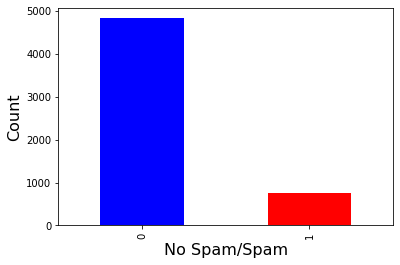

In [11]:
#visualizating the data
data.Sender.value_counts().plot.bar(color=['blue','red'])
py.xlabel('No Spam/Spam', fontsize=16)
py.ylabel('Count', fontsize=16)
is_spam=data[data.Sender==1]
test=is_spam
#print(test)



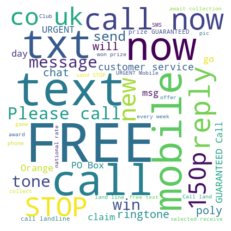

In [12]:
# Create a string called text with all the spam messages :
text = " ".join(msg for msg in is_spam.Message)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=400,height=400,max_font_size=100, max_words=50, background_color="white").generate(text)

# Display the generated image:
py.imshow(wordcloud, interpolation='bilinear')
#py.figure(figsize=(200,200))
py.axis("off")
py.show()

In [13]:
#Data preprocessing - lower case, tokenization, stemming and removing stopwords
def remove_punctuation_stopwords_lower(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    sms_no_punctuation_stopwords = [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_stopwords

In [14]:
data['Message'].apply(remove_punctuation_stopwords_lower).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [25]:
vectorizer = TfidfVectorizer(tokenizer=remove_punctuation_stopwords_lower)
tfidf=vectorizer.fit_transform(data['Message'])


In [19]:

from sklearn.naive_bayes import MultinomialNB

#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(tfidf, data['Sender'],random_state=0)

#Build the model
classifier= MultinomialNB().fit(xtrain, ytrain)

In [21]:
from sklearn import metrics

print("Testing with Test Data :\n------------------------")
#Predict on test data
predictions=classifier.predict(xtest)
print("Confusion Matrix : ")
print(metrics.confusion_matrix(ytest, predictions))
print("\n Prediction Accuracy : ",  \
      metrics.accuracy_score(ytest, predictions) )

print("\nTesting with Full Corpus :\n--------------------------")
#Predict on entire corpus data
predictions=classifier.predict(tfidf)
print("Confusion Matrix : ")
print(metrics.confusion_matrix(data['Sender'], predictions))
print("\n Prediction Accuracy : ",  \
      metrics.accuracy_score(data['Sender'], predictions) )

Testing with Test Data :
------------------------
Confusion Matrix : 
[[1196    0]
 [  68  129]]

 Prediction Accuracy :  0.9511844938980617

Testing with Full Corpus :
--------------------------
Confusion Matrix : 
[[4825    0]
 [ 181  566]]

 Prediction Accuracy :  0.967516152189519
